In [2]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [3]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()

[.............................X.........$]


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 11, 'reward': [0, 100.0], 'population': 22, 'knowledge': 0.275, 'numerosity': 22}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 200, 'reward': [26.041239148074258, 45.39053484164614], 'population': 56, 'knowledge': 0.575, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 200, 'reward': [59.568746751609794, 55.28679908468694], 'population': 55, 'knowledge': 0.55, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 200, 'reward': [20.20947943482906, 28.168292840466904], 'population': 55, 'knowledge': 0.55, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 200, 'reward': [69.55094421700716, 42.72867420161852], 'population': 54, 'knowledge': 0.525, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 200, 'reward': [36.35022236541144, 43.26661486178161], 'population': 52, 'knowledge': 0.525, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 200, 'reward': [27.17400656126761, 27.609476859467918], 'population': 52, 'knowledge': 0.525, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 200, 'reward': [40.1754675310716, 43.54214577895127], 'population': 52, 'knowledge': 0.525, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 200, 'reward': [47.77051261534822, 44.14016220566127], 'population': 52, 'knowledge': 0.525, 'numerosity': 200}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 26, 'reward': [28.400664500076903, 149.01055523347085], 'population': 52, 'knowledge': 0.525, 'numerosity': 200}


Cond:28 - Act:0 - Num:3 [fit: 0.000, exp: 803.00, pred: 169.209]
Cond:28 - Act:1 - Num:4 [fit: 0.003, exp: 544.00, pred: 157.228]
Cond:29 - Act:1 - Num:6 [fit: 0.234, exp: 442.00, pred: 152.905]
Cond:3# - Act:0 - Num:6 [fit: 0.402, exp: 3921.00, pred: 145.504]
Cond:30 - Act:1 - Num:7 [fit: 0.578, exp: 524.00, pred: 140.899]
Cond:31 - Act:0 - Num:1 [fit: 0.007, exp: 598.00, pred: 145.981]
Cond:31 - Act:1 - Num:3 [fit: 0.651, exp: 504.00, pred: 143.477]
Cond:32 - Act:0 - Num:1 [fit: 0.048, exp: 557.00, pred: 140.093]
Cond:32 - Act:1 - Num:11 [fit: 0.478, exp: 427.00, pred: 132.673]
Cond:33 - Act:1 - Num:9 [fit: 0.000, exp: 439.00, pred: 128.396]
Cond:34 - Act:1 - Num:9 [fit: 0.000, exp: 458.00, pred: 120.399]
Cond:35 - Act:0 - Num:1 [fit: 0.003, exp: 431.00, pred: 133.460]
Cond:35 - Act:1 - Num:7 [fit: 0.020, exp: 469.00, pred: 122.152]
Cond:36 - Act:0 - Num:1 [fit: 0.005, exp: 412.00, pred: 119.698]
Cond:36 - Act:1 - Num:7 [fit: 0.036, exp: 433.00, pred: 121.174]
Cond:37 - Act:0 - Num:1

(0.0, 250.0)

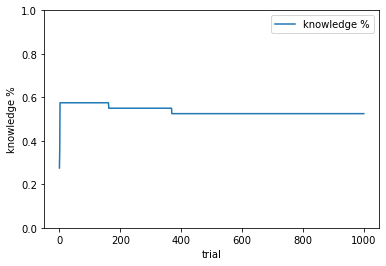

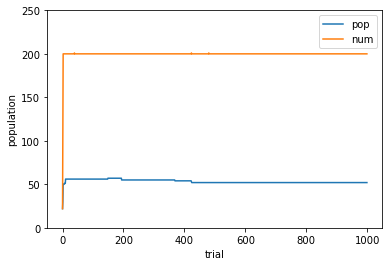

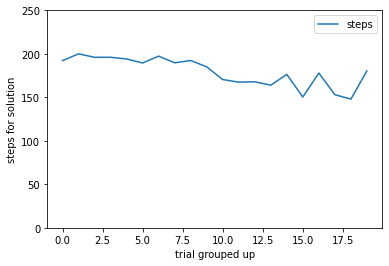

In [4]:
from lcs.agents.xcs import XCS, Configuration

# TODO: Move to utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=1,
                    covering_wildcard_chance=1,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))
print("Following is prediction Array. In case of Corridor better the last value the better")
print(explore_population.prediction_array)

import pandas as pd
import numpy as np

# TODO Merge explore and exploit

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])
ax.set_ylim(ymin=0, ymax=1)


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])
ax.set_ylim(ymin=0, ymax=250)


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
ax.set_ylim(ymin=0, ymax=250)